In [1]:
import pandas as pd
import numpy as np
import copy
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


# GENE DATA 

In [2]:
genedata = pd.read_csv("./Datasets/genedata.csv")
ids = genedata["id"].tolist()
outputs = genedata["class"].tolist()
features = genedata[genedata.columns[2:]].values
classes = 5
features = normalize(features)

In [3]:
dimensionsPCA = [ i for i in range(1,101)]
dimensionsTNSE = [ i for i in range(1,11)]

distances =["euclidean", "cosine", "manhattan"]
linkages =["single", "complete", "average"]

## PCA

In [4]:
#best config for agglomerative
data =[]
optimal ={}
for pcad in dimensionsPCA:
    pcadata = PCA(svd_solver="full", n_components =pcad).fit_transform(features)
    for distance in distances:
        for linkage in linkages+[ "ward" if distance=="euclidean" else ""]:
            if linkage!="":
                for clusterN in range(2,10):
                    labels =AgglomerativeClustering(n_clusters=clusterN, affinity=distance, linkage=linkage ).fit_predict(pcadata)
                    nmi = normalized_mutual_info_score(outputs, labels, average_method="geometric" )
                    spec =distance+"_"+linkage+"_agglomerative_dim"
                    if spec not in optimal.keys():
                        optimal[spec]=[0, pcad, clusterN]
                    if optimal[spec][0]< nmi:    
                        optimal[spec] = [nmi, pcad,clusterN]
                    print(spec, optimal[spec])
#those take some time to run (you just have to wait)
genePCA =pd.DataFrame(optimal).T
genePCA

euclidean_single_agglomerative_dim [0.011025289527285771, 1, 2]
euclidean_single_agglomerative_dim [0.018240127150047986, 1, 3]
euclidean_single_agglomerative_dim [0.4747517422338624, 1, 4]
euclidean_single_agglomerative_dim [0.4788062929215301, 1, 5]
euclidean_single_agglomerative_dim [0.4788062929215301, 1, 5]
euclidean_single_agglomerative_dim [0.4788062929215301, 1, 5]
euclidean_single_agglomerative_dim [0.4788062929215301, 1, 5]
euclidean_single_agglomerative_dim [0.4788062929215301, 1, 5]
euclidean_complete_agglomerative_dim [0.5006092844478119, 1, 2]
euclidean_complete_agglomerative_dim [0.5006092844478119, 1, 2]
euclidean_complete_agglomerative_dim [0.5006092844478119, 1, 2]
euclidean_complete_agglomerative_dim [0.5006092844478119, 1, 2]
euclidean_complete_agglomerative_dim [0.5006092844478119, 1, 2]
euclidean_complete_agglomerative_dim [0.5006092844478119, 1, 2]
euclidean_complete_agglomerative_dim [0.5006092844478119, 1, 2]
euclidean_complete_agglomerative_dim [0.500609284447

cosine_average_agglomerative_dim [0.5152066556927368, 2, 3]
manhattan_single_agglomerative_dim [0.4788062929215301, 1, 5]
manhattan_single_agglomerative_dim [0.4788062929215301, 1, 5]
manhattan_single_agglomerative_dim [0.4788062929215301, 1, 5]
manhattan_single_agglomerative_dim [0.4788062929215301, 1, 5]
manhattan_single_agglomerative_dim [0.4788062929215301, 1, 5]
manhattan_single_agglomerative_dim [0.4788062929215301, 1, 5]
manhattan_single_agglomerative_dim [0.4788062929215301, 1, 5]
manhattan_single_agglomerative_dim [0.4881889053219078, 2, 9]
manhattan_complete_agglomerative_dim [0.5006092844478119, 1, 2]
manhattan_complete_agglomerative_dim [0.5006092844478119, 1, 2]
manhattan_complete_agglomerative_dim [0.6027545602841609, 2, 4]
manhattan_complete_agglomerative_dim [0.6314853443088171, 2, 5]
manhattan_complete_agglomerative_dim [0.6314853443088171, 2, 5]
manhattan_complete_agglomerative_dim [0.6314853443088171, 2, 5]
manhattan_complete_agglomerative_dim [0.6314853443088171, 2,

euclidean_ward_agglomerative_dim [0.809324893839963, 4, 6]
euclidean_ward_agglomerative_dim [0.809324893839963, 4, 6]
euclidean_ward_agglomerative_dim [0.809324893839963, 4, 6]
euclidean_ward_agglomerative_dim [0.809324893839963, 4, 6]
cosine_single_agglomerative_dim [0.5197580614554805, 2, 9]
cosine_single_agglomerative_dim [0.5197580614554805, 2, 9]
cosine_single_agglomerative_dim [0.5197580614554805, 2, 9]
cosine_single_agglomerative_dim [0.5197580614554805, 2, 9]
cosine_single_agglomerative_dim [0.5197580614554805, 2, 9]
cosine_single_agglomerative_dim [0.5197580614554805, 2, 9]
cosine_single_agglomerative_dim [0.5197580614554805, 2, 9]
cosine_single_agglomerative_dim [0.5197580614554805, 2, 9]
cosine_complete_agglomerative_dim [0.6723557687913259, 3, 6]
cosine_complete_agglomerative_dim [0.6723557687913259, 3, 6]
cosine_complete_agglomerative_dim [0.7000512157533779, 4, 4]
cosine_complete_agglomerative_dim [0.7000512157533779, 4, 4]
cosine_complete_agglomerative_dim [0.70005121575

euclidean_complete_agglomerative_dim [0.7705161886294593, 3, 4]
euclidean_complete_agglomerative_dim [0.7705161886294593, 3, 4]
euclidean_complete_agglomerative_dim [0.7705161886294593, 3, 4]
euclidean_complete_agglomerative_dim [0.7705161886294593, 3, 4]
euclidean_complete_agglomerative_dim [0.7705161886294593, 3, 4]
euclidean_complete_agglomerative_dim [0.7705161886294593, 3, 4]
euclidean_complete_agglomerative_dim [0.7705161886294593, 3, 4]
euclidean_average_agglomerative_dim [0.7993709628412173, 4, 5]
euclidean_average_agglomerative_dim [0.7993709628412173, 4, 5]
euclidean_average_agglomerative_dim [0.7993709628412173, 4, 5]
euclidean_average_agglomerative_dim [0.7993709628412173, 4, 5]
euclidean_average_agglomerative_dim [0.7993709628412173, 4, 5]
euclidean_average_agglomerative_dim [0.808494017756832, 6, 7]
euclidean_average_agglomerative_dim [0.808494017756832, 6, 7]
euclidean_average_agglomerative_dim [0.808494017756832, 6, 7]
euclidean_ward_agglomerative_dim [0.897953949049647

manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.535259515055

cosine_complete_agglomerative_dim [0.788734110032855, 8, 5]
cosine_complete_agglomerative_dim [0.788734110032855, 8, 5]
cosine_complete_agglomerative_dim [0.788734110032855, 8, 5]
cosine_complete_agglomerative_dim [0.788734110032855, 8, 5]
cosine_complete_agglomerative_dim [0.788734110032855, 8, 5]
cosine_complete_agglomerative_dim [0.788734110032855, 8, 5]
cosine_average_agglomerative_dim [0.9071477934737607, 8, 7]
cosine_average_agglomerative_dim [0.9071477934737607, 8, 7]
cosine_average_agglomerative_dim [0.9071477934737607, 8, 7]
cosine_average_agglomerative_dim [0.9071477934737607, 8, 7]
cosine_average_agglomerative_dim [0.9071477934737607, 8, 7]
cosine_average_agglomerative_dim [0.9071477934737607, 8, 7]
cosine_average_agglomerative_dim [0.9071477934737607, 8, 7]
cosine_average_agglomerative_dim [0.9071477934737607, 8, 7]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglo

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7

cosine_complete_agglomerative_dim [0.7946832089126155, 11, 7]
cosine_complete_agglomerative_dim [0.7946832089126155, 11, 7]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerati

manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6

cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
cosine_average_agglomerative_dim [0.9231906281546342, 13, 4]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single

euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_wa

manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6,

cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single

euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidea

manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6,

cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomer

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]


cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerati

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]


cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 1

cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7

cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 1

cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_comple

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10,

cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_com

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.74

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926

cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manh

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.74

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192,

cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhatt

euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_complete_agglomerative_dim [0.871

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.879363156492619

cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhatt

euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_complete_agglomerative_dim [0.871

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926

cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manh

euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
euclidean_ward_agglomerative_dim [0.9577034091872607, 10, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_complete_agglomerative_dim [0.871

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.87936315649

cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
m

euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.87

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926

cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim

manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10, 7]
euclidean_complete_agglomerative_dim [0.8793631564926192, 10,

cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single

euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_average_agglomerative_dim [0.906341204903943, 9, 9]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
euclidean_ward_agglomerative_dim [0.9595322151867892, 82, 5]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomerative_dim [0.7441142567422444, 5, 8]
cosine_single_agglomer

manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_complete_agglomerative_dim [0.7484304841500361, 5, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
manhattan_average_agglomerative_dim [0.8229571166929396, 3, 9]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6, 6]
euclidean_single_agglomerative_dim [0.5352595150552032, 6,

cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_complete_agglomerative_dim [0.8718656321043756, 15, 7]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
cosine_average_agglomerative_dim [0.9675164141470297, 21, 5]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single_agglomerative_dim [0.5241020332719256, 5, 9]
manhattan_single

,0,1,2
euclidean_single_agglomerative_dim,0.535260,6.0,6.0
euclidean_complete_agglomerative_dim,0.879363,10.0,7.0
euclidean_average_agglomerative_dim,0.906341,9.0,9.0
euclidean_ward_agglomerative_dim,0.959532,82.0,5.0
cosine_single_agglomerative_dim,0.744114,5.0,8.0
cosine_complete_agglomerative_dim,0.871866,15.0,7.0
cosine_average_agglomerative_dim,0.967516,21.0,5.0
manhattan_single_agglomerative_dim,0.524102,5.0,9.0
manhattan_complete_agglomerative_dim,0.748430,5.0,9.0
manhattan_average_agglomerative_dim,0.822957,3.0,9.0


## TNSE

In [5]:
#best config for agglomerative
data =[]
optimal ={}
for pcad in dimensionsTNSE:
    print(pcad)
    pcadata = TSNE(n_components =pcad,init='pca', method='exact', random_state=0).fit_transform(features)
    for distance in distances:
        for linkage in linkages+[ "ward" if distance=="euclidean" else ""]:
            if linkage!="":
                for clusterN in range(2,10):
                    labels =AgglomerativeClustering(n_clusters=clusterN, affinity=distance, linkage=linkage ).fit_predict(pcadata)
                    nmi = normalized_mutual_info_score(outputs, labels, average_method="geometric" )
                    spec =distance+"_"+linkage+"_agglomerative_dim"
                    if spec not in optimal.keys():
                        optimal[spec]=[0, pcad,clusterN]
                    if optimal[spec][0]< nmi:    
                        optimal[spec] = [nmi, pcad, clusterN]
                    print(spec, optimal[spec])

geneTnse =pd.DataFrame(optimal).T    
geneTnse

1
euclidean_single_agglomerative_dim [0.5321201565904743, 1, 2]
euclidean_single_agglomerative_dim [0.7482586696146387, 1, 3]
euclidean_single_agglomerative_dim [0.8613662509615524, 1, 4]
euclidean_single_agglomerative_dim [0.8642134630705557, 1, 5]
euclidean_single_agglomerative_dim [0.8667834130623004, 1, 6]
euclidean_single_agglomerative_dim [0.8667834130623004, 1, 6]
euclidean_single_agglomerative_dim [0.9747175371517643, 1, 8]
euclidean_single_agglomerative_dim [0.9747175371517643, 1, 8]
euclidean_complete_agglomerative_dim [0.5208108342560821, 1, 2]
euclidean_complete_agglomerative_dim [0.7155258937571223, 1, 3]
euclidean_complete_agglomerative_dim [0.7155258937571223, 1, 3]
euclidean_complete_agglomerative_dim [0.7721283963678807, 1, 5]
euclidean_complete_agglomerative_dim [0.8473324709066318, 1, 6]
euclidean_complete_agglomerative_dim [0.8473324709066318, 1, 6]
euclidean_complete_agglomerative_dim [0.8473324709066318, 1, 6]
euclidean_complete_agglomerative_dim [0.84733247090663

manhattan_single_agglomerative_dim [0.9881970327503622, 2, 6]
manhattan_single_agglomerative_dim [0.9881970327503622, 2, 6]
manhattan_single_agglomerative_dim [0.9881970327503622, 2, 6]
manhattan_single_agglomerative_dim [0.9881970327503622, 2, 6]
manhattan_complete_agglomerative_dim [0.8473324709066318, 1, 6]
manhattan_complete_agglomerative_dim [0.8473324709066318, 1, 6]
manhattan_complete_agglomerative_dim [0.8473324709066318, 1, 6]
manhattan_complete_agglomerative_dim [0.9069127691855388, 2, 5]
manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_average_agglomerative_dim [0.9336376052141853, 1, 6]
manhattan_average_agglomerative_dim [0.9336376052141853, 1, 6]
manhattan_average_agglomerative_dim [0.9336376052141853, 1, 6]
manhattan_average_agglomerative_dim [0.9906346094268289

cosine_single_agglomerative_dim [0.9314650123085907, 2, 5]
cosine_single_agglomerative_dim [0.9314650123085907, 2, 5]
cosine_single_agglomerative_dim [0.9314650123085907, 2, 5]
cosine_single_agglomerative_dim [0.9314650123085907, 2, 5]
cosine_single_agglomerative_dim [0.9314650123085907, 2, 5]
cosine_single_agglomerative_dim [0.9314650123085907, 2, 5]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.92

euclidean_complete_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_complete_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_complete_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_complete_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_complete_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_complete_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_complete_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_complete_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_average_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_average_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_average_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_average_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_average_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_average_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_average_agglomerative_dim [0.9906346094268289, 2, 5]
euclidean_average_agglomerative_dim [0.99063460

manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_complete_agglomerative_dim [0.944571552054188, 2, 6]
manhattan_average_agglomerative_dim [0.9906346094268289, 2, 5]
manhattan_average_agglomerative_dim [0.9906346094268289, 2, 5]
manhattan_average_agglomerative_dim [0.9906346094268289, 2, 5]
manhattan_average_agglomerative_dim [0.9906346094268289, 2, 5]
manhattan_average_agglomerative_dim [0.9906346094268289, 2, 5]
manhattan_average_agglomerative_dim [0.9906346094268289, 2, 5]
manhattan_average_agglomerative_dim [0.9906346094268289, 2, 5]
manhattan_average_agglomerative_dim [0.9906346094268289, 2, 5]
8
euclidean_single_agglomerative_dim [0.988197032750362

cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_complete_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.9296976104478664, 2, 4]
cosine_average_agglomerative_dim [0.9296976104478664, 2, 4]
manhattan_single_agglomerative_d

,0,1,2
euclidean_single_agglomerative_dim,0.988197,2.0,6.0
euclidean_complete_agglomerative_dim,0.990635,2.0,5.0
euclidean_average_agglomerative_dim,0.990635,2.0,5.0
euclidean_ward_agglomerative_dim,0.990635,2.0,5.0
cosine_single_agglomerative_dim,0.931465,2.0,5.0
cosine_complete_agglomerative_dim,0.929698,2.0,4.0
cosine_average_agglomerative_dim,0.929698,2.0,4.0
manhattan_single_agglomerative_dim,0.988197,2.0,6.0
manhattan_complete_agglomerative_dim,0.944572,2.0,6.0
manhattan_average_agglomerative_dim,0.990635,2.0,5.0


In [6]:
from sklearn.cluster import KMeans
tnsedata = TSNE(n_components =2,init='pca', method='exact', random_state=0).fit_transform(features)

labels =KMeans(n_clusters=5).fit(tnsedata)
nmi = normalized_mutual_info_score(outputs, labels.labels_, average_method="geometric" )
nmi

0.9848003929207365

5


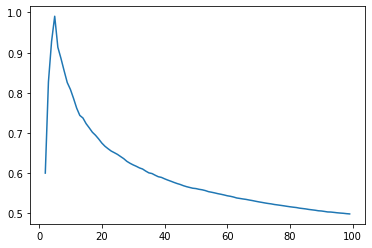

In [7]:
from sklearn.cluster import KMeans
tnsedata = TSNE(n_components =2,init='pca', method='exact', random_state=0).fit_transform(features)
X=[]
Y=[]
for clusterN in range(2, 100):
    labels =AgglomerativeClustering(n_clusters=clusterN, affinity="euclidean", linkage="ward" ).fit_predict(tnsedata)
    X.append(clusterN)
    Y.append(normalized_mutual_info_score(outputs, labels))
print(X[np.argmax(Y)])
plt.plot(X, Y)

# MSDATA

In [8]:
msdata = pd.read_csv("./Datasets/msdata.csv")
ids = msdata["id"].tolist()
outputs = msdata["class"].tolist()
features = msdata[msdata.columns[2:]].values
classes = 5
features = normalize(features)

In [9]:
dimensionsPCA = [ i for i in range(1,101)]
dimensionsTNSE = [ i for i in range(1,11)]

distances =["euclidean", "cosine", "manhattan"]
linkages =["single", "complete", "average"]

## PCA

In [10]:
#best config for agglomerative
data =[]
optimal ={}
for pcad in dimensionsPCA:
    pcadata = PCA(svd_solver="full", n_components =pcad).fit_transform(features)
    for distance in distances:
        for linkage in linkages+[ "ward" if distance=="euclidean" else ""]:
            if linkage!="":
                for clusterN in range(2,10):
                    labels =AgglomerativeClustering(n_clusters=clusterN, affinity=distance, linkage=linkage ).fit_predict(pcadata)
                    nmi = normalized_mutual_info_score(outputs, labels, average_method="geometric" )
                    spec =distance+"_"+linkage+"_agglomerative_dim"
                    if spec not in optimal.keys():
                        optimal[spec]=[0, pcad, clusterN]
                    if optimal[spec][0]< nmi:    
                        optimal[spec] = [nmi, pcad,clusterN]
                    print(spec, optimal[spec])
msdataPCA =pd.DataFrame(optimal).T
msdataPCA

euclidean_single_agglomerative_dim [0.019908859361392015, 1, 2]
euclidean_single_agglomerative_dim [0.02986123133358172, 1, 3]
euclidean_single_agglomerative_dim [0.02986123133358172, 1, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.760435446330

manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7604354463307997, 1, 2]
manhattan_complete_agglomerative_dim [0.7604354463307997, 1, 2]
manhattan_complete_agglomerative_dim [0.7604354463307997, 1, 2]
manhattan_complete_agglomerative_dim [0.7604354463307997, 1, 2]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002

euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.844026

euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585

manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582

cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerativ

euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_wa

manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 

cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerativ

euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_ag

manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5

cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerati

euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerat

manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 

cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_comple

euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.94734

manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1,

cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_a

euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.94734

manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 

cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhatta

euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913

euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997

cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manh

euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.844026691

euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997

cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]


euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266

euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.94158387448

manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312

cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9

euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.950784755698

manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662

cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [

euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]


manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582

cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative

euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglom

manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]


cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerat

euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerat

manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]


cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomer

euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim 

manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 

cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_comple

euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.947343554

manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1,

cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_a

euclidean_average_agglomerative_dim [0.9415838744821461, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.947343554

manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
manhattan_average_agglomerative_dim [0.9216981893312529, 3, 3]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 

cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_co

euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913

euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997

cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manh

euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.84402669

euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997

cosine_average_agglomerative_dim [0.9400329745487183, 4, 3]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_single_agglomerative_dim [0.7463277662102582, 1, 5]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2, 6]
manhattan_complete_agglomerative_dim [0.7671780179898002, 2,

euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
euclidean_ward_agglomerative_dim [0.9507847556985585, 2, 3]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_single_agglomerative_dim [0.9473435545736898, 3, 5]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.8440266913380506, 2, 3]
cosine_complete_agglomerative_dim [0.84402669

euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_single_agglomerative_dim [0.7463277662102582, 1, 5]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997, 1, 2]
euclidean_complete_agglomerative_dim [0.7604354463307997

,0,1,2
euclidean_single_agglomerative_dim,0.746328,1.0,5.0
euclidean_complete_agglomerative_dim,0.760435,1.0,2.0
euclidean_average_agglomerative_dim,0.941584,2.0,3.0
euclidean_ward_agglomerative_dim,0.950785,2.0,3.0
cosine_single_agglomerative_dim,0.947344,3.0,5.0
cosine_complete_agglomerative_dim,0.844027,2.0,3.0
cosine_average_agglomerative_dim,0.940033,4.0,3.0
manhattan_single_agglomerative_dim,0.746328,1.0,5.0
manhattan_complete_agglomerative_dim,0.767178,2.0,6.0
manhattan_average_agglomerative_dim,0.921698,3.0,3.0


In [11]:
from sklearn.cluster import KMeans
pcadata = PCA(n_components =2,svd_solver="full").fit_transform(features)

labels =KMeans(n_clusters=3).fit(pcadata)
nmi = normalized_mutual_info_score(outputs, labels.labels_, average_method="geometric" )
nmi

0.9225158913338186

3


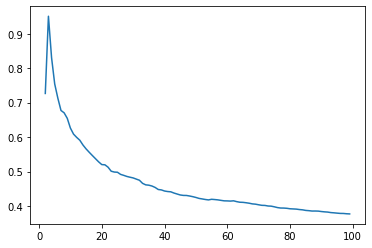

In [12]:
from sklearn.cluster import KMeans
pcadata = PCA(n_components =2,svd_solver="full").fit_transform(features)
X=[]
Y=[]
for clusterN in range(2, 100):
    labels =AgglomerativeClustering(n_clusters=clusterN, affinity="euclidean", linkage="ward" ).fit_predict(pcadata)
    X.append(clusterN)
    Y.append(normalized_mutual_info_score(outputs, labels))
print(X[np.argmax(Y)])
plt.plot(X, Y)

## TNSE

In [13]:
#best config for agglomerative
data =[]
optimal ={}
for pcad in dimensionsTNSE:
    print(pcad)
    pcadata = TSNE(n_components =pcad,init='pca', method='exact', random_state=0).fit_transform(features)
    for distance in distances:
        for linkage in linkages+[ "ward" if distance=="euclidean" else ""]:
            if linkage!="":
                for clusterN in range(2,10):
                    labels =AgglomerativeClustering(n_clusters=clusterN, affinity=distance, linkage=linkage ).fit_predict(pcadata)
                    nmi = normalized_mutual_info_score(outputs, labels, average_method="geometric" )
                    spec =distance+"_"+linkage+"_agglomerative_dim"
                    if spec not in optimal.keys():
                        optimal[spec]=[0, pcad,clusterN]
                    if optimal[spec][0]< nmi:    
                        optimal[spec] = [nmi, pcad, clusterN]
                    print(spec, optimal[spec])

msdataTnse =pd.DataFrame(optimal).T    
msdataTnse

1
euclidean_single_agglomerative_dim [0.004089400642423522, 1, 2]
euclidean_single_agglomerative_dim [0.017205941068120022, 1, 3]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_complete_agglomerative_dim [0.004089400642423522, 1, 2]
euclidean_complete_agglomerative_dim [0.017205941068120022, 1, 3]
euclidean_complete_agglomerative_dim [0.2600830199081009, 1, 4]
euclidean_complete_agglomerative_dim [0.2600830199081009, 1, 4]
euclidean_complete_agglomerative_dim [0.5005543381267835, 1, 6]
euclidean_complete_agglomerative_dim [0.5005543381267835, 1, 6]
euclidean_complete_agglomerative_dim [0.5005543381267835, 1, 6]
euclidean_complete_agglomerative_dim [0.500554338126

manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_complete_agglomerative_dim [0.5005543381267835, 1, 6]
manhattan_complete_agglomerative_dim [0.5005543381267835, 1, 6]
manhattan_complete_agglomerative_dim [0.5005543381267835, 1, 6]
manhattan_complete_agglomerative_dim [0.5005543381267835, 1, 6]
manhattan_complete_agglomerative_dim [0.5005543381267835, 1, 6]
manhattan_complete_agglomerative_dim [0.5005543381267835, 1, 6]
manhattan_complete_agglomerative_dim [0.5005543381267835, 1, 6]
manhattan_complete_agglomerative_dim [0.5005543381267835, 1, 6]
manhattan_average_agglomerative_dim [0.4195032415845786, 1, 7]
manhattan_average_agglomerative_dim [0.4195032415845786, 1, 7]
manhattan_average_agglomerative_dim [0.4195032415845786, 

cosine_single_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_complete_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_complete_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_complete_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_complete_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_complete_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_complete_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_complete_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_complete_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim 

euclidean_average_agglomerative_dim [0.4195032415845786, 1, 7]
euclidean_average_agglomerative_dim [0.4195032415845786, 1, 7]
euclidean_average_agglomerative_dim [0.4195032415845786, 1, 7]
euclidean_average_agglomerative_dim [0.4195032415845786, 1, 7]
euclidean_average_agglomerative_dim [0.4195032415845786, 1, 7]
euclidean_average_agglomerative_dim [0.4195032415845786, 1, 7]
euclidean_average_agglomerative_dim [0.4195032415845786, 1, 7]
euclidean_average_agglomerative_dim [0.4195032415845786, 1, 7]
euclidean_ward_agglomerative_dim [0.530004698562898, 1, 9]
euclidean_ward_agglomerative_dim [0.530004698562898, 1, 9]
euclidean_ward_agglomerative_dim [0.530004698562898, 1, 9]
euclidean_ward_agglomerative_dim [0.530004698562898, 1, 9]
euclidean_ward_agglomerative_dim [0.530004698562898, 1, 9]
euclidean_ward_agglomerative_dim [0.530004698562898, 1, 9]
euclidean_ward_agglomerative_dim [0.530004698562898, 1, 9]
euclidean_ward_agglomerative_dim [0.530004698562898, 1, 9]
cosine_single_agglomerat

manhattan_average_agglomerative_dim [0.4195032415845786, 1, 7]
manhattan_average_agglomerative_dim [0.4195032415845786, 1, 7]
manhattan_average_agglomerative_dim [0.4195032415845786, 1, 7]
manhattan_average_agglomerative_dim [0.4195032415845786, 1, 7]
manhattan_average_agglomerative_dim [0.4195032415845786, 1, 7]
manhattan_average_agglomerative_dim [0.4195032415845786, 1, 7]
manhattan_average_agglomerative_dim [0.4195032415845786, 1, 7]
8
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_single_agglomerative_dim [0.152137135530407, 1, 4]
euclidean_complete_agglomerative_dim [0.5005543381267835, 1, 6]
eucli

cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
cosine_average_agglomerative_dim [0.3909947086224219, 1, 2]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_single_agglomerative_dim [0.152137135530407, 1, 4]
manhattan_complete_agglomerative

,0,1,2
euclidean_single_agglomerative_dim,0.152137,1.0,4.0
euclidean_complete_agglomerative_dim,0.500554,1.0,6.0
euclidean_average_agglomerative_dim,0.419503,1.0,7.0
euclidean_ward_agglomerative_dim,0.530005,1.0,9.0
cosine_single_agglomerative_dim,0.390995,1.0,2.0
cosine_complete_agglomerative_dim,0.390995,1.0,2.0
cosine_average_agglomerative_dim,0.390995,1.0,2.0
manhattan_single_agglomerative_dim,0.152137,1.0,4.0
manhattan_complete_agglomerative_dim,0.500554,1.0,6.0
manhattan_average_agglomerative_dim,0.419503,1.0,7.0
